In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import musec
import musec_plot
import pingouin as pg
import os
from statannot import add_stat_annotation
from scipy.stats import binned_statistic
sns.set(style="darkgrid")


In [2]:
musec_df = musec.DataFrame()

# **Grouping data**
1. Familiarity
2. TIme-decision

Finally, we have 'familiarity_time' dataframe to use in this work.

> ## Familiarity

In [3]:
familiarity_df = musec_plot.familiarity(musec_df).DataFrame()
familiarity_favored_df = musec_plot.familiarity(musec_df).DataFrame('favored')
familiarity_nonfavored_df = musec_plot.familiarity(musec_df).DataFrame('non_favored')

In [4]:
familiarity_df

,Audio,Familiarity,Round,Audio_Round,Status
0,MIDI,0.390110,Normal,Midi_normal,All
1,MIDI,0.552198,Normal,Midi_normal,All
2,MIDI,0.436813,Normal,Midi_normal,All
3,MIDI,0.472527,Normal,Midi_normal,All
4,MIDI,0.673077,Normal,Midi_normal,All
...,...,...,...,...,...
1755,Song,1.000000,Re-check,Song_re-check,All
1756,Song,0.250000,Re-check,Song_re-check,All
1757,Song,1.000000,Re-check,Song_re-check,All
1758,Song,1.000000,Re-check,Song_re-check,All


In [4]:
familiarity_normal_df = pd.concat([familiarity_nonfavored_df[familiarity_nonfavored_df.Round == 'Normal'], familiarity_favored_df[familiarity_favored_df.Round == 'Normal']])

> ## Time-decision

In [5]:
time_favored_df = musec_plot.spending_time(musec_df, 'normal').DataFrame('favored')
time_nonfavored_df = musec_plot.spending_time(musec_df, 'normal').DataFrame('non_favored')

In [6]:
time_normal_df = pd.concat([time_nonfavored_df, time_favored_df])

> ## Concatenate Familiarity and Time-decision

In [7]:
def set_newidx(df):
    df['Index'] = np.arange(0, len(df))
    df_newidx = df.set_index('Index')
    
    return df_newidx

In [8]:
familiarity_time = pd.concat([set_newidx(familiarity_normal_df),
                              set_newidx(time_normal_df)[['Time(s)', 'log(Time)', '1/Time']]],
                             axis=1)

# **Binned correlation**

In [9]:
x_nonfavored_midi = familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                     (familiarity_time.Audio == 'MIDI')]['Familiarity']
y_nonfavored_midi = familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                     (familiarity_time.Audio == 'MIDI')]['1/Time']

x_favored_midi = familiarity_time[(familiarity_time.Status == 'Favored') & (familiarity_time.Audio == 'MIDI')]['Familiarity']
y_favored_midi = familiarity_time[(familiarity_time.Status == 'Favored') & (familiarity_time.Audio == 'MIDI')]['1/Time']


In [10]:
x_nonfavored_song = familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                     (familiarity_time.Audio == 'Song')]['Familiarity']
y_nonfavored_song = familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                     (familiarity_time.Audio == 'Song')]['1/Time']

x_favored_song = familiarity_time[(familiarity_time.Status == 'Favored') & (familiarity_time.Audio == 'Song')]['Familiarity']
y_favored_song = familiarity_time[(familiarity_time.Status == 'Favored') & (familiarity_time.Audio == 'Song')]['1/Time']

In [25]:
def binned_correlation(num_bins):
    
    bins=np.linspace(-1, 1, num_bins+1)
    bin_median_nonfavored_midi, bin_edges_nonfavored_midi, binnumber_nonfavored_midi = binned_statistic(x_nonfavored_midi,
                                                                                                        y_nonfavored_midi,
                                                                                                        statistic='median',
                                                                                                        bins=bins)
    
    bin_median_favored_midi, bin_edges_favored_midi, binnumber_favored_midi = binned_statistic(x_favored_midi,
                                                                                               y_favored_midi,
                                                                                               statistic='median',
                                                                                               bins=bins)
    
    bin_median_nonfavored_song, bin_edges_nonfavored_song, binnumber_nonfavored_song = binned_statistic(x_nonfavored_song,
                                                                                                        y_nonfavored_song,
                                                                                                        statistic='median',
                                                                                                        bins=bins)
    
    bin_median_favored_song, bin_edges_favored_song, binnumber_favored_song = binned_statistic(x_favored_song,
                                                                                               y_favored_song,
                                                                                               statistic='median',
                                                                                               bins=bins)

    
    

    fig, ax = plt.subplots(1, 2, figsize=(15,6), sharey=True)

    ax[0].scatter(x_nonfavored_midi, y_nonfavored_midi,  label='Non_Favored', color='purple', alpha=0.3)
    ax[0].scatter(x_favored_midi, y_favored_midi,  label='Favored', color='green', alpha=0.3)
    ax[0].scatter(bin_edges_nonfavored_midi[:-1]+np.diff(bin_edges_nonfavored_midi)/2,
                  bin_median_nonfavored_midi,
                  color="purple",
                  linestyle="--",
                  zorder=3,
                  lw=5)

    ax[0].scatter(bin_edges_favored_midi[:-1]+np.diff(bin_edges_favored_midi)/2,
                  bin_median_favored_midi,
                  color ="green",
                  linestyle="--",
                  zorder=3,
                  lw=5)


    ax[0].plot(bin_edges_nonfavored_midi[:-1]+np.diff(bin_edges_nonfavored_midi)/2,
               bin_median_nonfavored_midi,
               color="purple",
               zorder=3)

    ax[0].plot(bin_edges_favored_midi[:-1]+np.diff(bin_edges_favored_midi)/2,
               bin_median_favored_midi,
               color="green",
               zorder=3)
    
    ax[0].set_title('MIDI')
    ax[0].set_xlabel('Familiarity')
    ax[0].set_ylabel('Times')
    ax[0].set_ylim(0, 0.27)
    
    ax[1].scatter(x_nonfavored_song, y_nonfavored_song,  label='Non_Favored', color='purple', alpha=0.3)
    ax[1].scatter(x_favored_song, y_favored_song,  label='Favored', color='green', alpha=0.3)
    ax[1].scatter(bin_edges_nonfavored_song[:-1]+np.diff(bin_edges_nonfavored_song)/2,
                  bin_median_nonfavored_song,
                  color="purple",
                  linestyle="--",
                  zorder=3,
                  lw=5)

    ax[1].scatter(bin_edges_favored_song[:-1]+np.diff(bin_edges_favored_song)/2,
                  bin_median_favored_song,
                  color ="green",
                  linestyle="--",
                  zorder=3,
                  lw=5)


    ax[1].plot(bin_edges_nonfavored_song[:-1]+np.diff(bin_edges_nonfavored_song)/2,
               bin_median_nonfavored_song,
               color="purple",
               zorder=3)

    ax[1].plot(bin_edges_favored_song[:-1]+np.diff(bin_edges_favored_song)/2,
               bin_median_favored_song,
               color="green",
               zorder=3)
    
    ax[1].set_title('Song')
    ax[1].set_xlabel('Familiarity')

    ax[1].set_ylim(0.28, -0.1)
    fig.tight_layout(pad=3)

    for b in bins:
        ax[0].axvline(b, color='grey', linestyle='--', alpha=0.8)
        ax[1].axvline(b, color='grey', linestyle='--', alpha=0.8)


    ax[0].legend()
    print ('\n')
    print (pg.corr(bin_median_nonfavored_midi,
                   bin_edges_nonfavored_midi[:-1]+np.diff(bin_edges_nonfavored_midi)/2, method='spearman')['r'])
    print ('\n')



spearman    0.892857
Name: r, dtype: float64




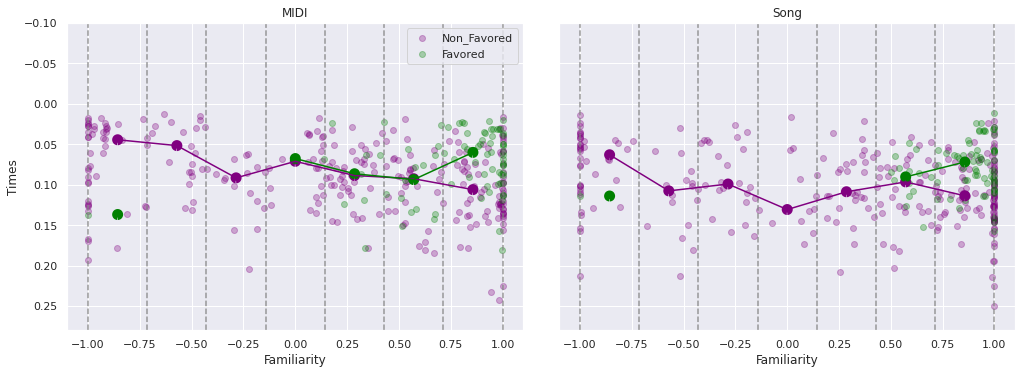

In [26]:
binned_correlation(7)

In [377]:
pg.corr(bin_median_nonfavored_song, bin_edges_nonfavored_song[:-1]+np.diff(bin_edges_nonfavored_song)/2, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,7,0.892857,"[0.43, 0.98]",0.797194,0.695791,0.006807,0.854032


In [340]:
pg.corr(bin_median_nonfavored_midi, bin_edges_nonfavored_midi[:-1]+np.diff(bin_edges_nonfavored_midi)/2, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,3,-1.0,"[-1.0, nan]",1.0,NaN,0.0,NaN


In [ ]:
spearman = pg.corr(df[(df.Audio == audio_status[0]) & (df.Status == audio_status[1])]['Familiarity'],
                       df[(df.Audio == audio_status[0]) & (df.Status == audio_status[1])][y_dv],
                       method='spearman')

In [619]:
def hist_familiarity(familiarity, time):
    fig, ax = plt.subplots(2, 3, figsize=(16,6))

    sns.distplot(familiarity_time[familiarity_time.Status == 'Non_favored'][familiarity],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[0][0])

    sns.distplot(familiarity_time[familiarity_time.Status == 'Favored'][familiarity],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[0][0])

    sns.distplot(familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                  (familiarity_time.Audio == 'MIDI')][familiarity],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[0][1])
    sns.distplot(familiarity_time[(familiarity_time.Status == 'Favored') &
                                  (familiarity_time.Audio == 'MIDI')][familiarity],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[0][1])

    sns.distplot(familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                  (familiarity_time.Audio == 'Song')][familiarity],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[0][2])
    sns.distplot(familiarity_time[(familiarity_time.Status == 'Favored') &
                                  (familiarity_time.Audio == 'Song')][familiarity],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[0][2],)
    
    ###############################################################################
    
    sns.distplot(familiarity_time[familiarity_time.Status == 'Non_favored'][time],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[1][0])

    sns.distplot(familiarity_time[familiarity_time.Status == 'Favored'][time],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[1][0])

    sns.distplot(familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                  (familiarity_time.Audio == 'MIDI')][time],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[1][1])
    sns.distplot(familiarity_time[(familiarity_time.Status == 'Favored') &
                                  (familiarity_time.Audio == 'MIDI')][time],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[1][1])

    sns.distplot(familiarity_time[(familiarity_time.Status == 'Non_favored') &
                                  (familiarity_time.Audio == 'Song')][time],
                 bins=7,
                 color='purple',
                 label='Non_Favored',
                 ax=ax[1][2])
    sns.distplot(familiarity_time[(familiarity_time.Status == 'Favored') &
                                  (familiarity_time.Audio == 'Song')][time],
                 bins=7,
                 color='green', 
                 label='Favored',
                 ax=ax[1][2],)

    ax[0][0].set_title('All audio')
    ax[0][1].set_title('MIDI')
    ax[0][2].set_title('Song')
    ax[0][0].set_xlabel('')
    ax[0][2].set_xlabel('')
    ax[0][0].legend()
    ax[0][0].set_ylim(0, 3)
    ax[0][1].set_ylim(0, 3)
    ax[0][2].set_ylim(0, 3)
    ax[0][0].set_xlim(-1.7, 1.7)
    ax[0][1].set_xlim(-1.7, 1.7)
    ax[0][2].set_xlim(-1.7, 1.7)
    
    
    ax[1][0].set_xlabel('')
    ax[1][2].set_xlabel('')
    ax[1][0].set_ylim(0,20)
    ax[1][1].set_ylim(0,20)
    ax[1][2].set_ylim(0,20)
    ax[1][0].set_xlim(-0.05, 0.31)
    ax[1][1].set_xlim(-0.05, 0.31)
    ax[1][2].set_xlim(-0.05, 0.31)
    

    fig.tight_layout(pad=2)



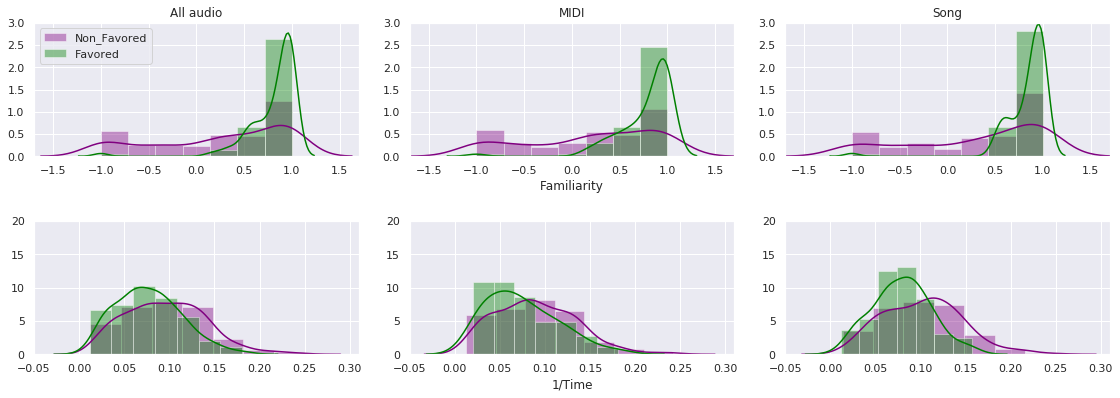

In [620]:
hist_familiarity('Familiarity', '1/Time')

# **Mann-Whitney**

In [81]:
def mann_whitney_plot(data, dv, fig_title):
    """
    dv : dependent variables
    """
    
    fig, ax = plt.subplots(figsize=(10,8))
    sns.set(style="darkgrid")

    sns.boxplot(x='Audio', y=dv,
                hue='Status', palette=dict(Non_favored="m", Favored="g"), saturation=0.65,
                data=data,)

    # ax = sns.swarmplot(x='AudioType', y='Familiarity',
    #               hue='Status', data=familiarity_normal_df,
    #               palette='Set2', size=5, color=".3", linewidth=1)
    

    sns.despine(offset=10, trim=True)
    ax.set_xlabel('Audio', fontsize=12)
    ax.set_ylabel(dv, fontsize=12)
    ax.tick_params(labelsize=12)
#     plt.axvspan('MIDI', , facecolor='red', alpha=0.2)
    plt.legend(loc=2, bbox_to_anchor=(1.03, 1), fontsize='12', frameon=False, title="Status")
    plt.title('Mann-Whitney : %s' % (fig_title),size='15')

    textstr = '\n'.join((
        r'ns : p > 0.05',
        r'* : p < 0.05',
        r'**, ***, **** : p < 0.01'))

    plt.text(1.04, 0.5, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', )

    add_stat_annotation(ax, data=data,
                        x='Audio', y=dv, hue='Status',
                        comparisons_correction=None,
                        box_pairs=[(('MIDI','Favored') , ('Song', 'Favored')),
                                   (('MIDI','Favored') , ('MIDI', 'Non_favored')),
                                   (('MIDI','Favored') , ('Song', 'Non_favored')),
                                   (('MIDI','Non_favored') , ('Song', 'Favored')),
                                   (('MIDI','Non_favored') , ('Song', 'Non_favored')),
                                   (('Song','Favored') , ('Song', 'Non_favored'))],
                        test='Mann-Whitney', text_format='star', loc='outside',
                        line_offset_to_box=0.12,
                        verbose=2, pvalues=None, color='0.2')


> ## Familiarity

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Song_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=3.049e-09 U_stat=6.235e+03
MIDI_Non_favored v.s. MIDI_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=3.305e-13 U_stat=5.130e+03
MIDI_Favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=9.571e-07 U_stat=1.490e+04
MIDI_Favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=2.580e-01 U_stat=2.944e+03
MIDI_Non_favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.629e-02 U_stat=3.235e+04
MIDI_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.688e-16 U_stat=4.361e+03


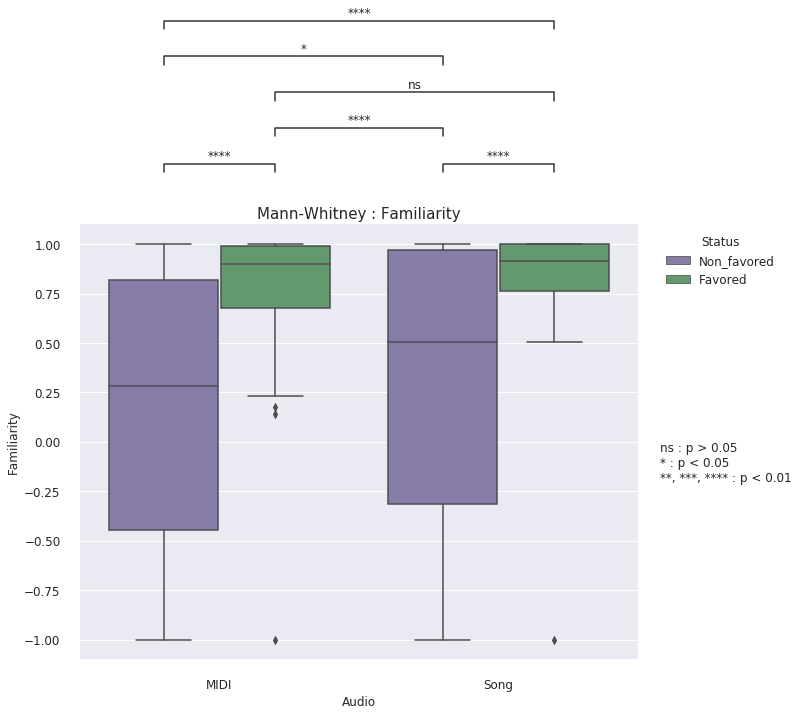

In [82]:
mann_whitney_plot(familiarity_time, 'Familiarity', 'Familiarity')

> ## Time-decision

In [75]:
# mann_whitney_plot(familiarity_time, 'Time(s)', 'Time-decision')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Song_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.968e-05 U_stat=1.441e+04
MIDI_Non_favored v.s. MIDI_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=6.351e-03 U_stat=1.317e+04
MIDI_Favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=4.033e-07 U_stat=6.903e+03
MIDI_Favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.707e-01 U_stat=2.871e+03
MIDI_Non_favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=5.936e-04 U_stat=3.046e+04
MIDI_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.049e-01 U_stat=1.228e+04


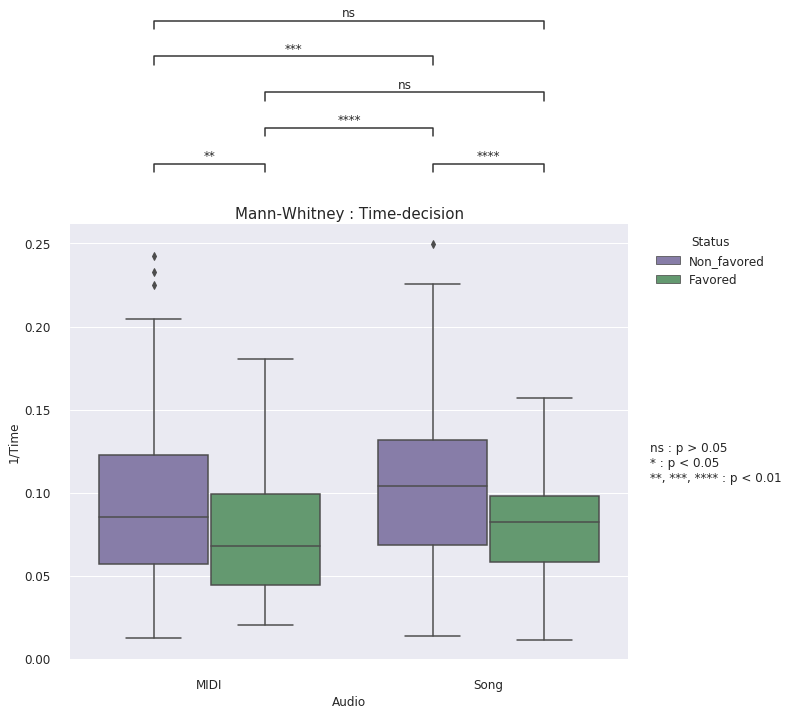

In [18]:
mann_whitney_plot(familiarity_time, '1/Time', 'Time-decision')

In [19]:
# pg.mwu(familiarity_favored_song['Familiarity'], familiarity_favored_midi['Familiarity'], tail='two-sided')

In [20]:
# pg.corr(familiarity_favored_song['Familiarity'], familiarity_favored_midi['Familiarity'], method='spearman')

# Spearman

In [21]:
def spearman(df, audio_status, y_dv):
    """
    df : Dataframe
    audio_status : list 
        - Ex. ['MIDI', 'Non_favored']
    """
    spearman = pg.corr(df[(df.Audio == audio_status[0]) & (df.Status == audio_status[1])]['Familiarity'],
                       df[(df.Audio == audio_status[0]) & (df.Status == audio_status[1])][y_dv],
                       method='spearman')
    
    return spearman

In [22]:
# spearman(familiarity_time, ['MIDI', 'Non_favored'], 'Time(s)')

In [23]:
# spearman(familiarity_time, ['Song', 'Non_favored'], 'log(Time)')

In [24]:
spearman_list = [spearman(familiarity_time, ['MIDI', 'Non_favored'], '1/Time')['r'].values[0],
                 spearman(familiarity_time, ['MIDI', 'Favored'], '1/Time')['r'].values[0],
                 spearman(familiarity_time, ['Song', 'Non_favored'], '1/Time')['r'].values[0],
                 spearman(familiarity_time, ['Song', 'Favored'], '1/Time')['r'].values[0]]
                 

In [25]:
spearman_list

[0.3053351075190786,
 -0.1449161266710245,
 0.23704864816565313,
 -0.11394517522591259]

/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


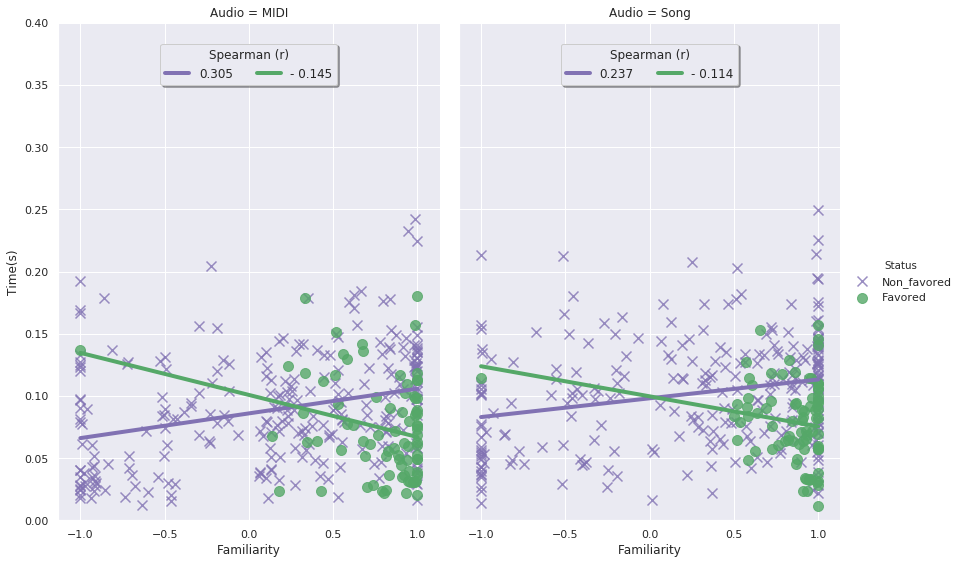

In [26]:
sns.set(style="darkgrid")


ax_reg = sns.lmplot(x="Familiarity", y="1/Time",
                    col="Audio", hue="Status", data=familiarity_time,
                    col_wrap=2, ci=None, palette=dict(Non_favored="m", Favored="g"), height=8, aspect=0.75, legend = True,
                    scatter_kws={"s": 100},
                    line_kws={"lw":4}, markers=["x", "o"])
# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')
(ax_reg.set_axis_labels("Familiarity", "Time(s)").set(ylim=(0, 0.4)).fig.subplots_adjust(wspace=.05))

# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')


# ax_reg.set_ylabel(fontsize=12)
# ax_reg.tick_params(labelsize=12)
plt.legend(loc=2, bbox_to_anchor=(1.03, 1), fontsize='12')
# plt.title('Mann-Whitney : %s' % (fig_title),size='15')


# Study ci's parameter ; Confidence interval ?
# palette=dict(Non_favored="g", Favored="orange")

# plot = sns.relplot(x='time', y='value', col='category3', hue='category1', style='category2', kind="line", col_wrap=2, data=df, facet_kws=dict(legend_out=False))
ax_reg_midi = ax_reg.axes[0]
ax_reg_song = ax_reg.axes[1]

handles_midi, labels_midi = ax_reg_midi.get_legend_handles_labels()
handles_song, labels_song = ax_reg_song.get_legend_handles_labels()

# ax_reg.axes[0].legend_.remove()
ax_reg_midi.legend(handles_midi,labels_midi, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['%s' % np.round(np.abs(spearman_list[0]), decimals=3) ,
                           '- %s' % np.round(np.abs(spearman_list[1]), decimals=3)],
                   title='Spearman (r)', fontsize=12)# you can specify any location parameter you want here

ax_reg_song.legend(handles_song,labels_song, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['%s' % np.round(np.abs(spearman_list[2]), decimals=3) ,
                           '- %s' % np.round(np.abs(spearman_list[3]), decimals=3)],
                   title='Spearman (r)', fontsize=12) # you can specify any location parameter you want here 

/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


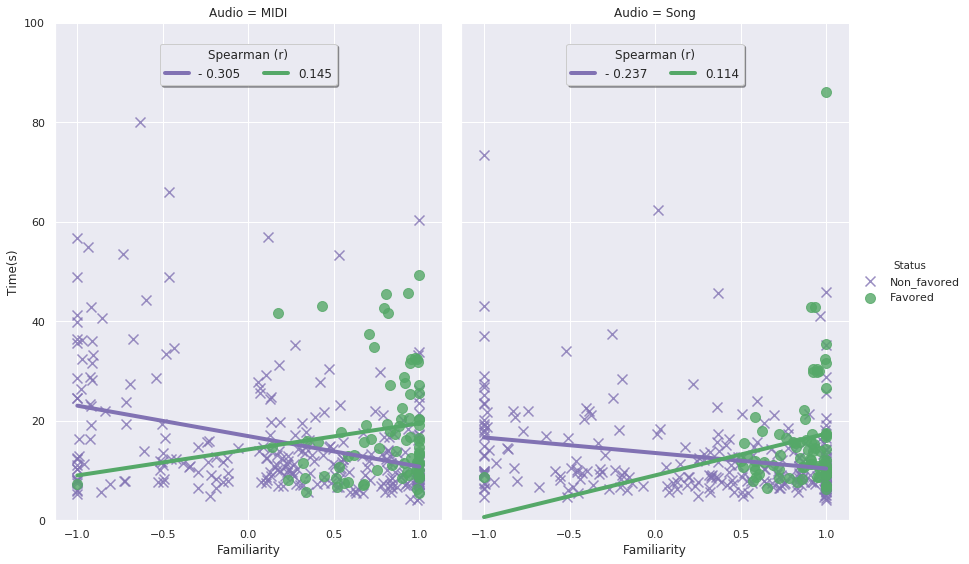

In [27]:
sns.set(style="darkgrid")


ax_reg = sns.lmplot(x="Familiarity", y="Time(s)",
                    col="Audio", hue="Status", data=familiarity_time,
                    col_wrap=2, ci=None, palette=dict(Non_favored="m", Favored="g"), height=8, aspect=0.75, legend = True,
                    scatter_kws={"s": 100},
                    line_kws={"lw":4}, markers=["x", "o"])
# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')
(ax_reg.set_axis_labels("Familiarity", "Time(s)").set(ylim=(0, 100)).fig.subplots_adjust(wspace=.05))

# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')


# ax_reg.set_ylabel(fontsize=12)
# ax_reg.tick_params(labelsize=12)
plt.legend(loc=2, bbox_to_anchor=(1.03, 1), fontsize='12')
# plt.title('Mann-Whitney : %s' % (fig_title),size='15')


# Study ci's parameter ; Confidence interval ?
# palette=dict(Non_favored="g", Favored="orange")

# plot = sns.relplot(x='time', y='value', col='category3', hue='category1', style='category2', kind="line", col_wrap=2, data=df, facet_kws=dict(legend_out=False))
ax_reg_midi = ax_reg.axes[0]
ax_reg_song = ax_reg.axes[1]

handles_midi, labels_midi = ax_reg_midi.get_legend_handles_labels()
handles_song, labels_song = ax_reg_song.get_legend_handles_labels()

# ax_reg.axes[0].legend_.remove()
ax_reg_midi.legend(handles_midi,labels_midi, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['- %s' % np.round(np.abs(spearman_list[0]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_list[1]), decimals=3)],
                   title='Spearman (r)', fontsize=12)# you can specify any location parameter you want here

ax_reg_song.legend(handles_song,labels_song, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['- %s' % np.round(np.abs(spearman_list[2]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_list[3]), decimals=3)],
                   title='Spearman (r)', fontsize=12) # you can specify any location parameter you want here 


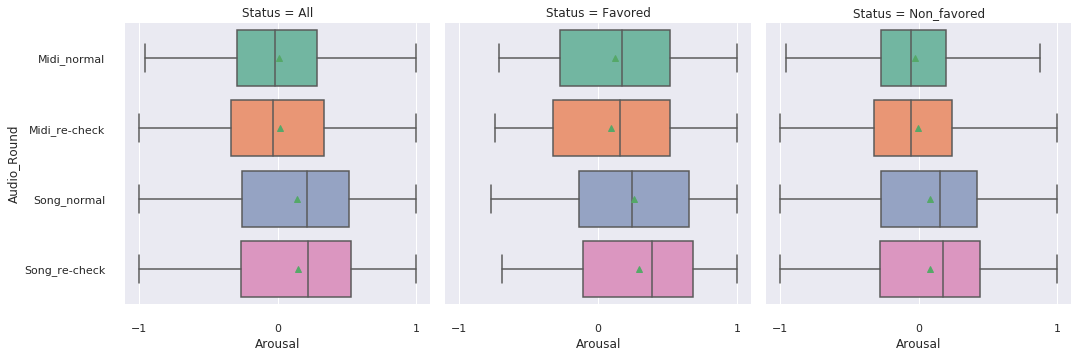

In [28]:
musec_plot.valence_arousal(musec_df, 'arousal').plot('box')

In [29]:
valence_nonfavored_df = musec_plot.valence_arousal(musec_df, 'valence').DataFrame('non_favored')
valence_favored_df = musec_plot.valence_arousal(musec_df, 'valence').DataFrame('favored')
arousal_nonfavored_df = musec_plot.valence_arousal(musec_df, 'arousal').DataFrame('non_favored')
arousal_favored_df = musec_plot.valence_arousal(musec_df, 'arousal').DataFrame('favored')

In [30]:
valence_normal_df = pd.concat([valence_nonfavored_df[valence_nonfavored_df.Round == 'Normal'],
                                                     valence_favored_df[valence_favored_df.Round == 'Normal']])
arousal_normal_df = pd.concat([arousal_nonfavored_df[arousal_nonfavored_df.Round == 'Normal'],
                               arousal_favored_df[arousal_favored_df.Round == 'Normal']])

In [31]:
arousal_normal_df

,Audio_name,Arousal,Audio,Round,Audio_Round,Status,Valence_Arousal
0,arousal_midi_m1_1,0.587912,MIDI,Normal,Midi_normal,Non_favored,Arousal
1,arousal_midi_m1_1,-0.214286,MIDI,Normal,Midi_normal,Non_favored,Arousal
2,arousal_midi_m1_1,-0.340659,MIDI,Normal,Midi_normal,Non_favored,Arousal
3,arousal_midi_m1_1,-0.324176,MIDI,Normal,Midi_normal,Non_favored,Arousal
4,arousal_midi_m1_1,0.758242,MIDI,Normal,Midi_normal,Non_favored,Arousal
...,...,...,...,...,...,...,...
238,arousal_song_m1_1,0.662088,Song,Normal,Song_normal,Favored,Arousal
239,arousal_song_m1_1,0.730769,Song,Normal,Song_normal,Favored,Arousal
240,arousal_song_m1_1,0.653846,Song,Normal,Song_normal,Favored,Arousal
241,arousal_song_m1_1,-0.467033,Song,Normal,Song_normal,Favored,Arousal


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Song_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=5.315e-07 U_stat=6.946e+03
MIDI_Non_favored v.s. MIDI_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=9.230e-03 U_stat=8.883e+03
MIDI_Favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.336e-02 U_stat=1.296e+04
MIDI_Favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.911e-02 U_stat=2.580e+03
MIDI_Non_favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=9.449e-01 U_stat=3.685e+04
MIDI_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.092e-07 U_stat=6.708e+03


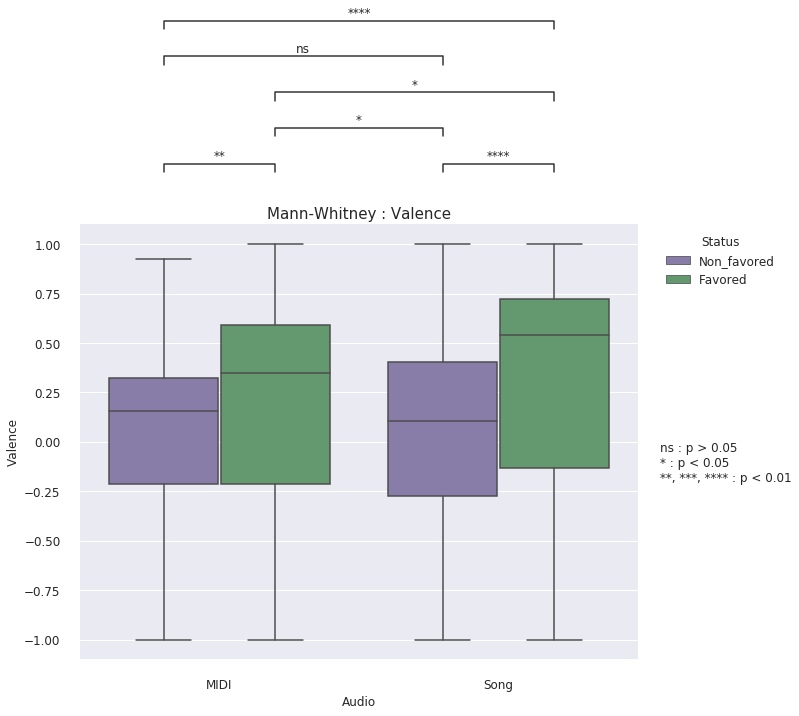

In [32]:
mann_whitney_plot(valence_normal_df, 'Valence', 'Valence')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Song_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.060e-02 U_stat=8.922e+03
MIDI_Non_favored v.s. MIDI_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=1.235e-02 U_stat=8.964e+03
MIDI_Favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=6.987e-01 U_stat=1.129e+04
MIDI_Favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=8.239e-02 U_stat=2.762e+03
MIDI_Non_favored v.s. Song_Non_favored: Mann-Whitney-Wilcoxon test two-sided, P_val=3.095e-03 U_stat=3.133e+04
MIDI_Non_favored v.s. Song_Favored: Mann-Whitney-Wilcoxon test two-sided, P_val=9.283e-07 U_stat=7.032e+03


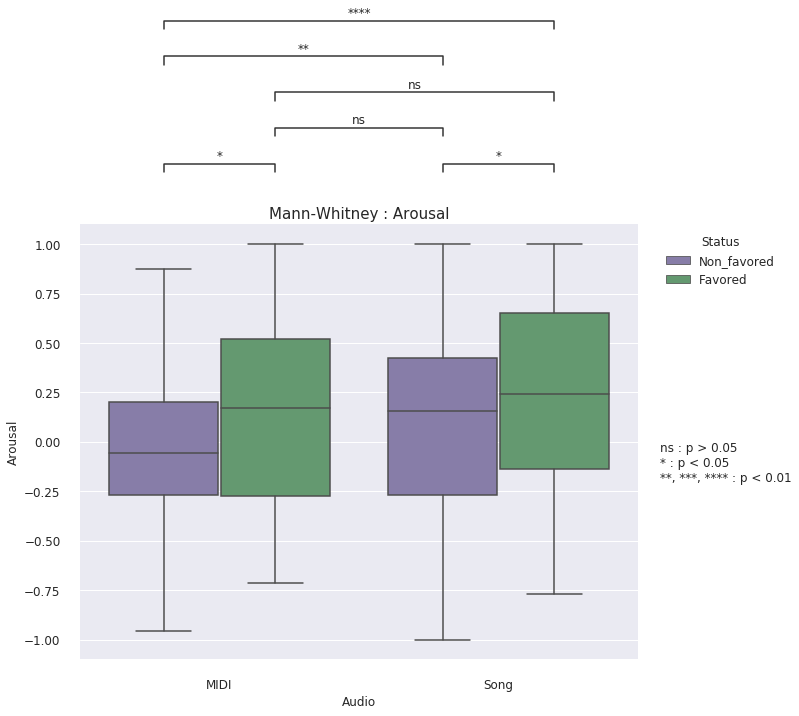

In [33]:
mann_whitney_plot(arousal_normal_df, 'Arousal', 'Arousal')

/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


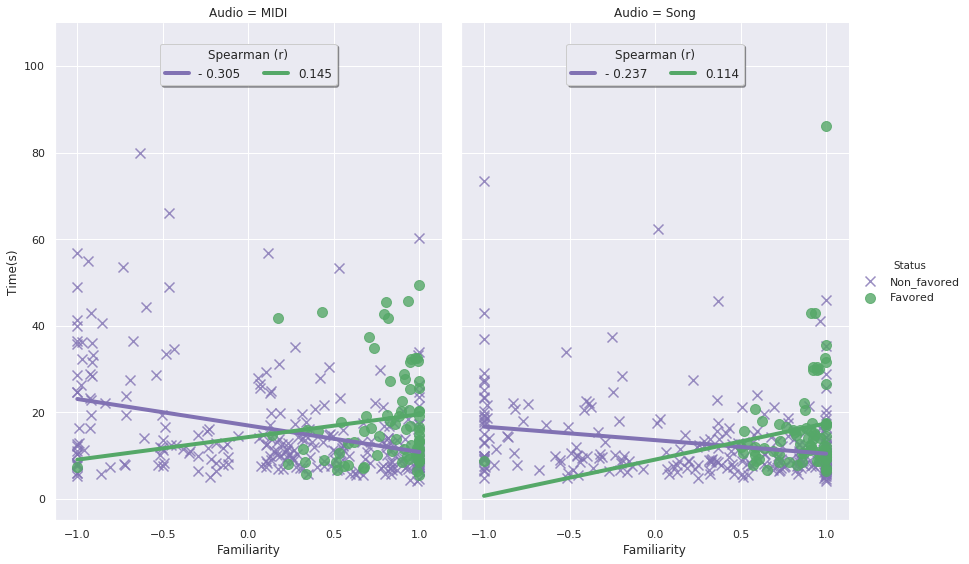

In [34]:
sns.set(style="darkgrid")


ax_reg = sns.lmplot(x="Familiarity", y="Time(s)",
                    col="Audio", hue="Status", data=familiarity_time,
                    col_wrap=2, ci=None, palette=dict(Non_favored="m", Favored="g"), height=8, aspect=0.75, legend = True,
                    scatter_kws={"s": 100},
                    line_kws={"lw":4}, markers=["x", "o"])
# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')
(ax_reg.set_axis_labels("Familiarity", "Time(s)").set(ylim=(-5, 110)).fig.subplots_adjust(wspace=.05))

# ax_reg_legend = ax_reg._legend
# ax_reg_legend.set_title('Spearman')


# ax_reg.set_ylabel(fontsize=12)
# ax_reg.tick_params(labelsize=12)
plt.legend(loc=2, bbox_to_anchor=(1.03, 1), fontsize='12')
# plt.title('Mann-Whitney : %s' % (fig_title),size='15')


# Study ci's parameter ; Confidence interval ?
# palette=dict(Non_favored="g", Favored="orange")

# plot = sns.relplot(x='time', y='value', col='category3', hue='category1', style='category2', kind="line", col_wrap=2, data=df, facet_kws=dict(legend_out=False))
ax_reg_midi = ax_reg.axes[0]
ax_reg_song = ax_reg.axes[1]

handles_midi, labels_midi = ax_reg_midi.get_legend_handles_labels()
handles_song, labels_song = ax_reg_song.get_legend_handles_labels()

# ax_reg.axes[0].legend_.remove()
ax_reg_midi.legend(handles_midi,labels_midi, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['- %s' % np.round(np.abs(spearman_list[0]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_list[1]), decimals=3)],
                   title='Spearman (r)', fontsize=12)# you can specify any location parameter you want here

ax_reg_song.legend(handles_song,labels_song, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['- %s' % np.round(np.abs(spearman_list[2]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_list[3]), decimals=3)],
                   title='Spearman (r)', fontsize=12) # you can specify any location parameter you want here 


In [35]:
arousal_normal_df

,Audio_name,Arousal,Audio,Round,Audio_Round,Status,Valence_Arousal
0,arousal_midi_m1_1,0.587912,MIDI,Normal,Midi_normal,Non_favored,Arousal
1,arousal_midi_m1_1,-0.214286,MIDI,Normal,Midi_normal,Non_favored,Arousal
2,arousal_midi_m1_1,-0.340659,MIDI,Normal,Midi_normal,Non_favored,Arousal
3,arousal_midi_m1_1,-0.324176,MIDI,Normal,Midi_normal,Non_favored,Arousal
4,arousal_midi_m1_1,0.758242,MIDI,Normal,Midi_normal,Non_favored,Arousal
...,...,...,...,...,...,...,...
238,arousal_song_m1_1,0.662088,Song,Normal,Song_normal,Favored,Arousal
239,arousal_song_m1_1,0.730769,Song,Normal,Song_normal,Favored,Arousal
240,arousal_song_m1_1,0.653846,Song,Normal,Song_normal,Favored,Arousal
241,arousal_song_m1_1,-0.467033,Song,Normal,Song_normal,Favored,Arousal


In [30]:
familiarity_time.to_csv('behavior_dataframe.csv')

In [37]:
valence_normal_df['Index'] = np.arange(0, len(familiarity_normal_df))
valence_normal_df_newidx = valence_normal_df.set_index('Index')

In [38]:
arousal_normal_df['Index'] = np.arange(0,len(arousal_normal_df))
arousal_normal_df_newidx = arousal_normal_df.set_index('Index')

In [39]:
valence_arousal = pd.concat([valence_normal_df_newidx,
                             arousal_normal_df_newidx['Arousal'], familiarity_time[['Familiarity', 'Time(s)']]],axis=1)

In [40]:
spearman_familiarity_va = [spearman(valence_arousal, ['MIDI', 'Non_favored'], 'Valence')['r'].values[0],
                           spearman(valence_arousal, ['MIDI', 'Favored'], 'Valence')['r'].values[0],
                           spearman(valence_arousal, ['Song', 'Non_favored'], 'Valence')['r'].values[0],
                           spearman(valence_arousal, ['Song', 'Favored'], 'Valence')['r'].values[0]]

In [41]:
spearman_familiarity_va

[0.060925197940258656,
 0.10259573570812179,
 0.09179865986150183,
 0.4136898600686091]

In [42]:
del valence_arousal['Valence_Arousal']

In [43]:
valence_arousal

,Audio_name,Valence,Audio,Round,Audio_Round,Status,Arousal,Familiarity,Time(s)
Index,,,,,,,,,
0,valence_midi_m1_1,0.516484,MIDI,Normal,Midi_normal,Non_favored,0.587912,0.390110,20.697850
1,valence_midi_m1_1,-0.186813,MIDI,Normal,Midi_normal,Non_favored,-0.214286,0.552198,12.394280
2,valence_midi_m1_1,0.241758,MIDI,Normal,Midi_normal,Non_favored,-0.340659,0.436813,13.096840
3,valence_midi_m1_1,0.582418,MIDI,Normal,Midi_normal,Non_favored,-0.324176,0.667582,5.420470
4,valence_midi_m1_1,0.549451,MIDI,Normal,Midi_normal,Non_favored,0.758242,0.859890,9.793090
...,...,...,...,...,...,...,...,...,...
699,valence_song_m1_1,0.637363,Song,Normal,Song_normal,Favored,0.662088,0.914835,17.378814
700,valence_song_m1_1,0.912088,Song,Normal,Song_normal,Favored,0.730769,0.928571,15.266285
701,valence_song_m1_1,0.626374,Song,Normal,Song_normal,Favored,0.653846,0.986264,12.153731


/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/soravitt/musec/musec-env/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


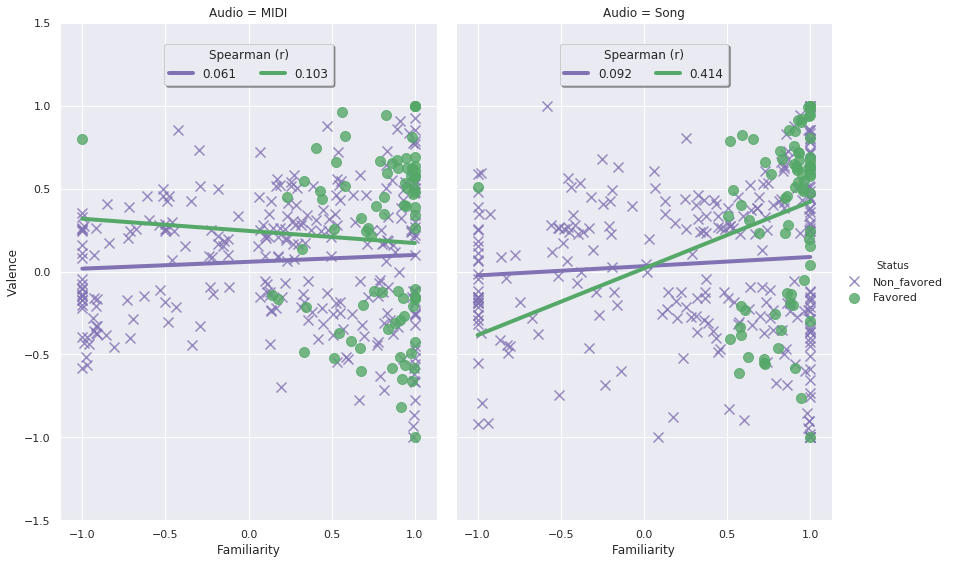

In [44]:
sns.set(style="darkgrid")
ax_valence = sns.lmplot(x="Familiarity", y="Valence",
                    col="Audio", hue="Status", data=valence_arousal,
                    col_wrap=2, ci=None, palette=dict(Non_favored="m", Favored="g"), height=8, aspect=0.75, legend = True,
                    scatter_kws={"s": 100},
                    line_kws={"lw":4}, markers=["x", "o"])

(ax_valence.set_axis_labels("Familiarity", "Valence").set(ylim=(-1.5, 1.5)).fig.subplots_adjust(wspace=.05))
plt.legend(loc=2, bbox_to_anchor=(1.03, 1), fontsize='12')

ax_valence_midi = ax_valence.axes[0]
ax_valence_song = ax_valence.axes[1]

handles_midi, labels_midi = ax_valence_midi.get_legend_handles_labels()
handles_song, labels_song = ax_valence_song.get_legend_handles_labels()

# ax_reg.axes[0].legend_.remove()
ax_valence_midi.legend(handles_midi,labels_midi, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['%s' % np.round(np.abs(spearman_familiarity_va[0]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_familiarity_va[1]), decimals=3)],
                   title='Spearman (r)', fontsize=12)# you can specify any location parameter you want here

ax_valence_song.legend(handles_song,labels_song, ncol=2, loc='upper center', 
                   bbox_to_anchor=(0.5, 0.97), frameon=True, shadow=True,
                   labels=['%s' % np.round(np.abs(spearman_familiarity_va[2]), decimals=3) ,
                           '%s' % np.round(np.abs(spearman_familiarity_va[3]), decimals=3)],
                   title='Spearman (r)', fontsize=12) # you can specify any location parameter you want here 


In [45]:
valence_arousal[(valence_arousal.Audio == 'MIDI') &
               (valence_arousal.Status == 'Non_favored')]

,Audio_name,Valence,Audio,Round,Audio_Round,Status,Arousal,Familiarity,Time(s)
Index,,,,,,,,,
0,valence_midi_m1_1,0.516484,MIDI,Normal,Midi_normal,Non_favored,0.587912,0.390110,20.697850
1,valence_midi_m1_1,-0.186813,MIDI,Normal,Midi_normal,Non_favored,-0.214286,0.552198,12.394280
2,valence_midi_m1_1,0.241758,MIDI,Normal,Midi_normal,Non_favored,-0.340659,0.436813,13.096840
3,valence_midi_m1_1,0.582418,MIDI,Normal,Midi_normal,Non_favored,-0.324176,0.667582,5.420470
4,valence_midi_m1_1,0.549451,MIDI,Normal,Midi_normal,Non_favored,0.758242,0.859890,9.793090
...,...,...,...,...,...,...,...,...,...
266,valence_midi_m1_1,0.337912,MIDI,Normal,Midi_normal,Non_favored,-0.239011,1.000000,6.430719
267,valence_midi_m1_1,0.879121,MIDI,Normal,Midi_normal,Non_favored,0.134615,0.472527,14.668095
268,valence_midi_m1_1,0.516484,MIDI,Normal,Midi_normal,Non_favored,-0.442308,-0.293956,6.391302


In [46]:
corr = pg.pairwise_corr(valence_arousal[(valence_arousal.Audio == 'MIDI') &
                                        (valence_arousal.Status == 'Favored')],
                        columns=['Valence', 'Arousal', 'Familiarity', 'Time(s)'],
                        method='spearman')
corr

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,Valence,Arousal,spearman,two-sided,81,0.537457,"[0.36, 0.68]",0.288860,0.270626,0.600573,2.297715e-07,0.999627
1,Valence,Familiarity,spearman,two-sided,81,0.102596,"[-0.12, 0.31]",0.010526,-0.014845,0.102958,3.620751e-01,0.149634
2,Valence,Time(s),spearman,two-sided,81,0.116166,"[-0.1, 0.33]",0.013494,-0.011801,0.116693,3.017241e-01,0.178935
3,Arousal,Familiarity,spearman,two-sided,81,0.261937,"[0.05, 0.45]",0.068611,0.044729,0.268187,1.816727e-02,0.663266
4,Arousal,Time(s),spearman,two-sided,81,0.039388,"[-0.18, 0.26]",0.001551,-0.024050,0.039409,7.269983e-01,0.063937
5,Familiarity,Time(s),spearman,two-sided,81,0.144916,"[-0.08, 0.35]",0.021001,-0.004102,0.145944,1.967733e-01,0.253679


In [47]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')


NameError: name 'df' is not defined

In [ ]:
corrs = valence_arousal[(valence_arousal.Audio == 'MIDI') &
                                        (valence_arousal.Status == 'Favored')].corr(method='spearman')
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.7, vmax=.7)
plt.title('Correlation matrix')

In [ ]:
corrs = valence_arousal[(valence_arousal.Audio == 'Song') &
                                        (valence_arousal.Status == 'Favored')].corr(method='spearman')
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.7, vmax=.7)
plt.title('Correlation matrix')

In [ ]:
corrs_pearson = valence_arousal[(valence_arousal.Audio == 'MIDI') &
                                        (valence_arousal.Status == 'Favored')].corr(method='pearson')
mask = np.zeros_like(corrs_pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs_pearson, cmap='Spectral_r', mask=mask, square=True, vmin=-.7, vmax=.7)
plt.title('Correlation matrix')